In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#using SVM and Random Forest
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
#lable encoding
from sklearn.preprocessing import LabelEncoder
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
#using PCA
from sklearn.decomposition import PCA

In [2]:
#load the data
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#check for missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
# check for duplicates
data.duplicated().sum()

0

In [5]:
#data encoding
label = LabelEncoder()
endcoded_columns = data.select_dtypes(include=['object']).columns
print(endcoded_columns)
#encode the columns
for col in endcoded_columns:
    data[col] = label.fit_transform(data[col])
data.head()

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [6]:
#split the data
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']
print(X.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(x_train.head())

(918, 11)
(918,)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,0
25,36,1,2,130,209,0,1,178,0,0.0,2
84,56,1,0,150,213,1,1,125,1,1.0,1
10,37,0,2,130,211,0,1,142,0,0.0,2
344,51,1,0,120,0,1,1,104,0,0.0,1


In [7]:
#feature scaling
scaler = StandardScaler()
features_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
x_train[features_to_scale] = scaler.fit_transform(x_train[features_to_scale])
x_test[features_to_scale] = scaler.transform(x_test[features_to_scale])
x_train.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,-1.245067,1,2,-0.708985,0.372803,1,1,2.284353,0,0.8,0
25,-1.886236,1,2,-0.166285,0.086146,0,1,1.652241,0,0.0,2
84,0.250993,1,0,0.919115,0.123134,1,1,-0.441628,1,1.0,1
10,-1.779375,0,2,-0.166285,0.104640,0,1,0.229991,0,0.0,2
344,-0.283314,1,0,-0.708985,-1.846478,1,1,-1.271274,0,0.0,1


Class Distribution in Percentage:
 HeartDisease
1    55.337691
0    44.662309
Name: count, dtype: float64


/tmp/ipykernel_3528/2586695866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='Set2')


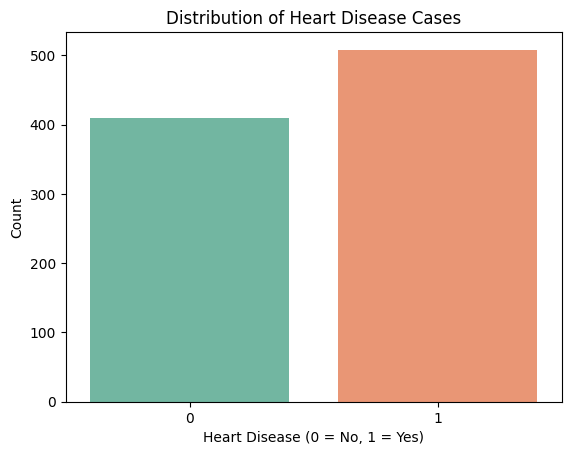

In [8]:

class_counts = data['HeartDisease'].value_counts()

# Display the percentage of each class
class_percentages = class_counts / len(data) * 100
print("Class Distribution in Percentage:\n", class_percentages)

# Plotting class distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='HeartDisease', data=data, palette='Set2')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



Accuracy:  0.8586956521739131
Confusion Matrix: 
 [[66 11]
 [15 92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



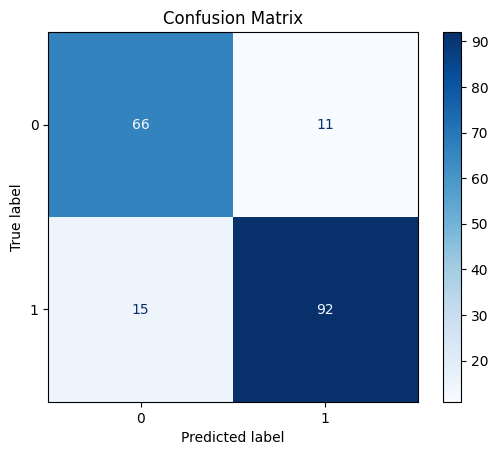

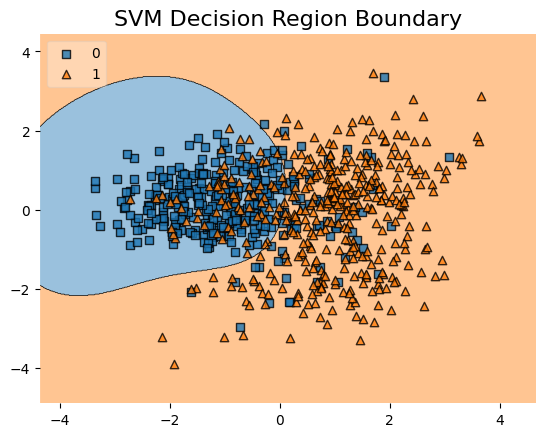

In [9]:
#SVM
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_svm)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))


# plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# plot the decision boundary
pca=PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
svm_pca = SVC()
svm_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=svm_pca, legend=2)

plt.title('SVM Decision Region Boundary', size=16)
plt.show()






Accuracy:  0.875
Confusion Matrix: 
 [[68  9]
 [14 93]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



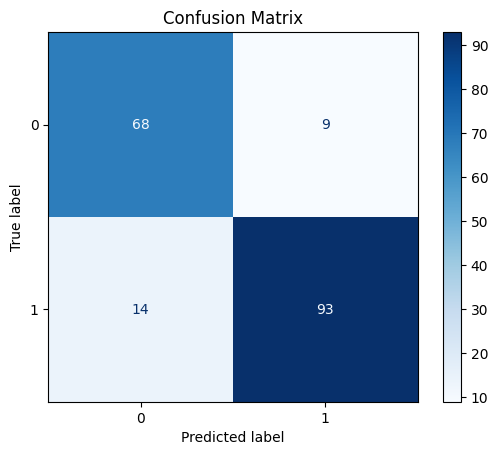

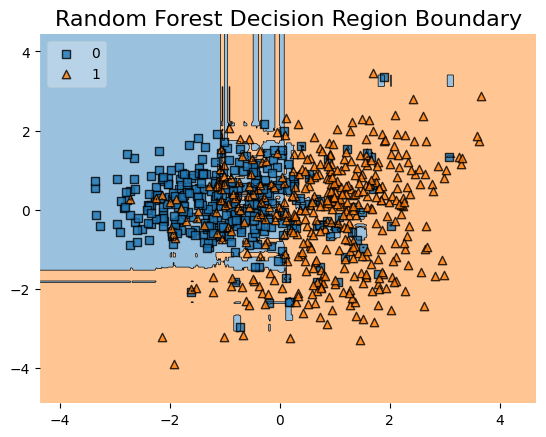

In [24]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy_rf= accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_rf)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# plot the decision boundary
x_train_pca= pca.fit_transform(x_train)
rf_pca = RandomForestClassifier()
rf_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=rf_pca, legend=2)
plt.title('Random Forest Decision Region Boundary', size=16)
plt.show()


Accuracy:  0.842391304347826
Confusion Matrix: 
 [[68  9]
 [20 87]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



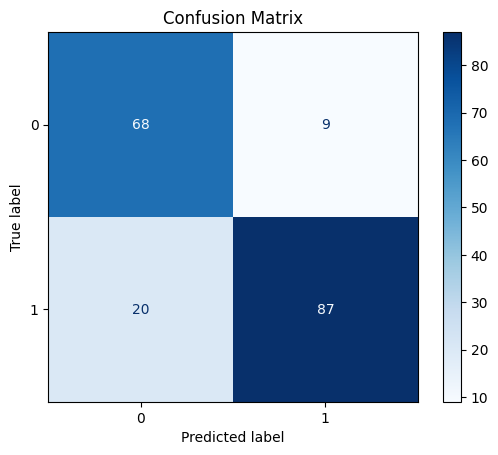

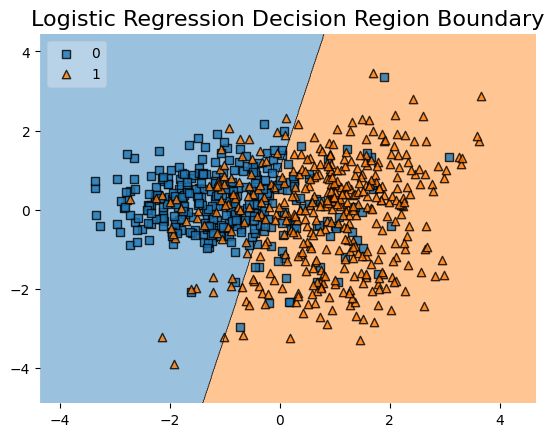

In [25]:
#LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_lr)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# plot the decision boundary
x_train_pca = pca.fit_transform(x_train)        
lr_pca = LogisticRegression()
lr_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=lr_pca, legend=2)
plt.title('Logistic Regression Decision Region Boundary', size=16)
plt.show()



Accuracy:  0.8532608695652174
Confusion Matrix: 
 [[69  8]
 [19 88]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84        77
           1       0.92      0.82      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



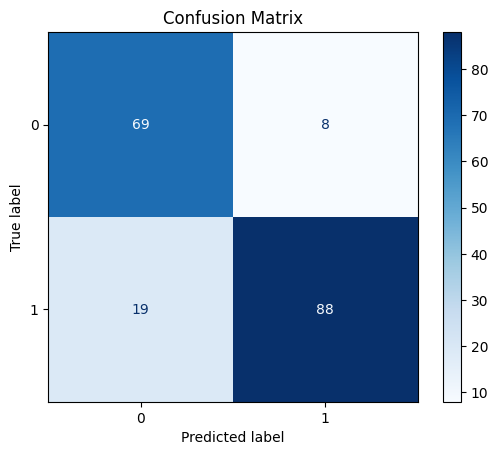

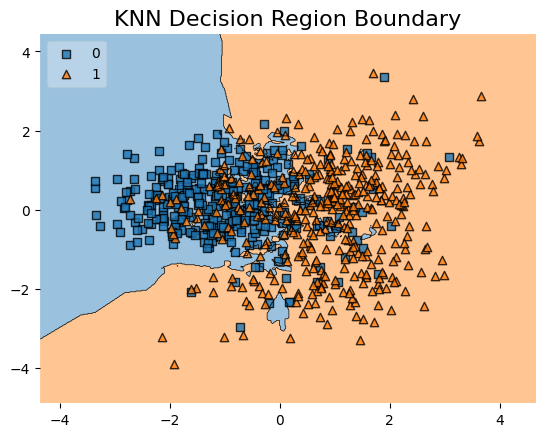

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_knn)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# plot the decision boundary
x_train_pca = pca.fit_transform(x_train)
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=knn_pca, legend=2)
plt.title('KNN Decision Region Boundary', size=16)
plt.show()


Accuracy:  0.8043478260869565
Confusion Matrix: 
 [[66 11]
 [25 82]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79        77
           1       0.88      0.77      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.82      0.80      0.81       184



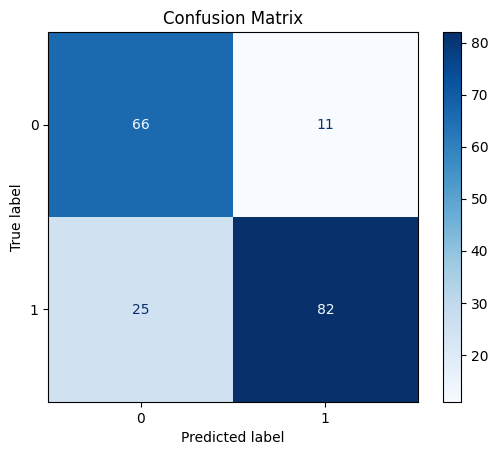

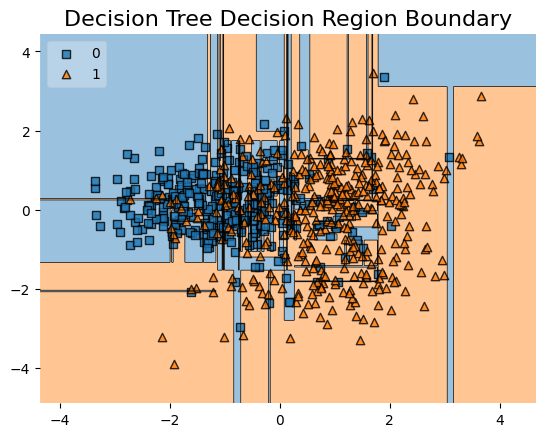

In [27]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_dt= accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy_dt)
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# plot the decision boundary
x_train_pca = pca.fit_transform(x_train)
dt_pca = DecisionTreeClassifier()
dt_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=dt_pca, legend=2)
plt.title('Decision Tree Decision Region Boundary', size=16)
plt.show()


Naive Bayes Accuracy: 0.842391304347826
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



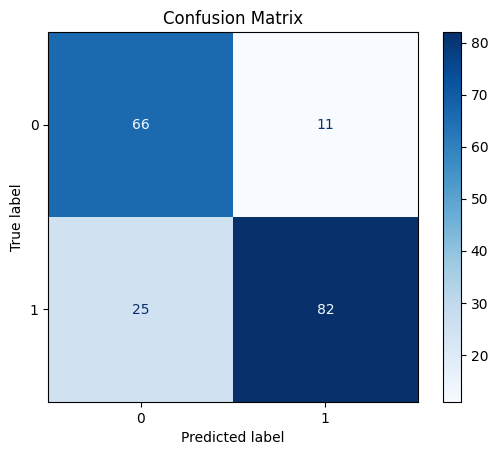

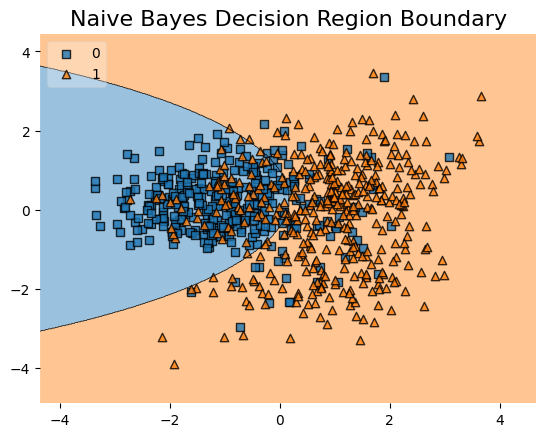

In [28]:
#Naive Bayes
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

y_pred_nb = naive_bayes.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# plot the decision boundary
x_train_pca = pca.fit_transform(x_train)    
naive_bayes_pca = GaussianNB()
naive_bayes_pca.fit(x_train_pca, y_train)
plot_decision_regions(x_train_pca, y_train.values, clf=naive_bayes_pca, legend=2)
plt.title('Naive Bayes Decision Region Boundary', size=16)
plt.show()


Epoch 1/50


/opt/conda/envs/quant/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7786 - loss: 0.5612 - val_accuracy: 0.8043 - val_loss: 0.4903
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8144 - loss: 0.4480 - val_accuracy: 0.8315 - val_loss: 0.4375
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.3845 - val_accuracy: 0.8424 - val_loss: 0.4182
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.3699 - val_accuracy: 0.8478 - val_loss: 0.4122
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3588 - val_accuracy: 0.8478 - val_loss: 0.4061
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.3446 - val_accuracy: 0.8370 - val_loss: 0.3847
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8797 - loss: 0.3248 - val_accuracy: 0.8478 - val_loss: 0.3886
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3342 - val_accuracy: 0.8424 - val_loss: 0.4010
Epo

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8811 - loss: 0.2977 - val_accuracy: 0.8478 - val_loss: 0.3599
Epoch 16/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8666 - loss: 0.3110 - val_accuracy: 0.8533 - val_loss: 0.3473
Epoch 17/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8527 - loss: 0.3129 - val_accuracy: 0.8478 - val_loss: 0.3493
Epoch 18/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8763 - loss: 0.2774 - val_accuracy: 0.8533 - val_loss: 0.3421
Epoch 19/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8814 - loss: 0.2778 - val_accuracy: 0.8533 - val_loss: 0.3426
Epoch 20/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8892 - loss: 0.2834 - val_accuracy: 0.8424 - val_loss: 0.3556
Epoch 21/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8737 - loss: 0.2946 - val_accuracy: 0.8804 - val_loss: 0.3233
Epoch 22/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.2684 - val_accuracy: 0.8478 - val_loss: 0.3

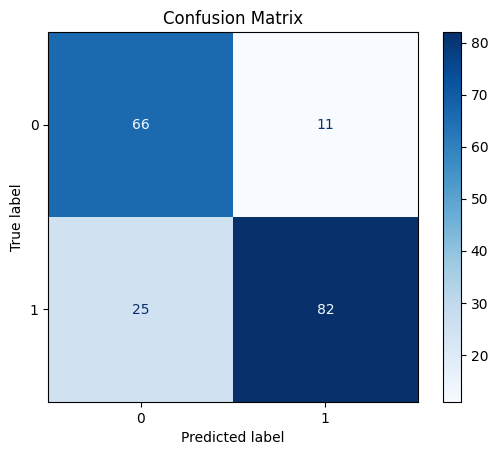

Epoch 1/50


/opt/conda/envs/quant/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6184 - loss: 0.6696 - val_accuracy: 0.7609 - val_loss: 0.5926
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7988 - loss: 0.5424 - val_accuracy: 0.7663 - val_loss: 0.5230
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4752 - val_accuracy: 0.7772 - val_loss: 0.4999
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8002 - loss: 0.4408 - val_accuracy: 0.7772 - val_loss: 0.4991
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.4813 - val_accuracy: 0.7717 - val_loss: 0.5016
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8165 - loss: 0.4323 - val_accuracy: 0.7717 - val_loss: 0.5004
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.4138 - val_accuracy: 0.7717 - val_loss: 0.4983
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4040 - val_accuracy: 0.7717 - val_loss: 0.4978
Epo

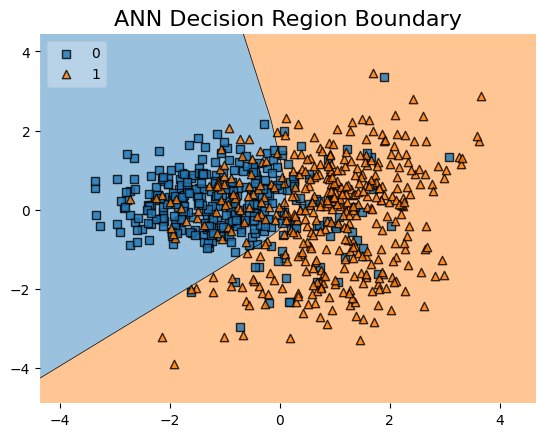

In [29]:
#ANN
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f"ANN Accuracy: {accuracy}")

y_pred_ann = (model.predict(x_test) > 0.5).astype("int32")
print("Classification Report:\n", classification_report(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy:", accuracy_ann)


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# plot the decision boundary
x_train_pca = pca.fit_transform(x_train)
model_pca = Sequential()
model_pca.add(Dense(64, input_dim=x_train_pca.shape[1], activation='relu'))
model_pca.add(Dense(32, activation='relu'))
model_pca.add(Dense(1, activation='sigmoid'))
model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_pca.fit(x_train_pca, y_train, epochs=50, batch_size=32, validation_data=(pca.transform(x_test), y_test))
plot_decision_regions(x_train_pca, y_train.values, clf=model_pca, legend=2)
plt.title('ANN Decision Region Boundary', size=16)
plt.show()

/tmp/ipykernel_31814/2040572848.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


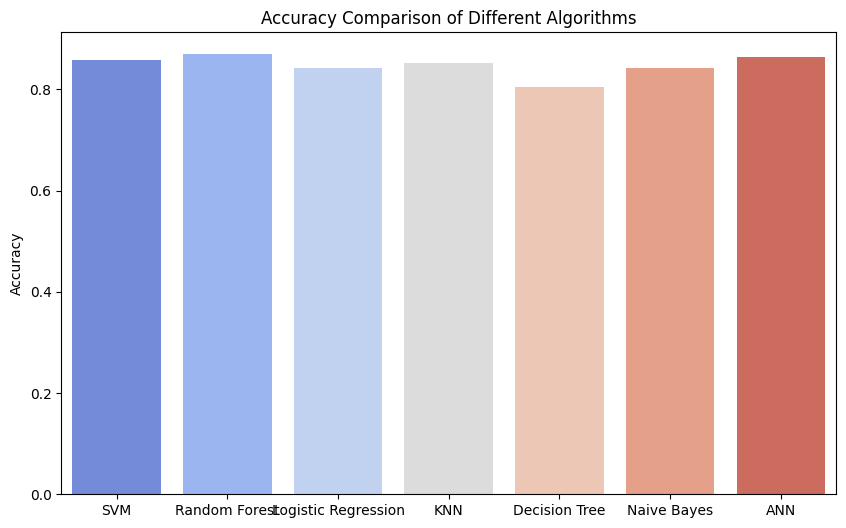

In [19]:
# Assuming you have stored the accuracies in variables
models = ['SVM', 'Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'ANN']
accuracies = [accuracy_svm, accuracy_rf, accuracy_lr, accuracy_knn, accuracy_dt, accuracy_nb, accuracy_ann]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Accuracy Comparison of Different Algorithms')
plt.ylabel('Accuracy')
plt.show()
